## Импорт библиотек

In [138]:
from binance.um_futures import UMFutures
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Создание клиента Binance
client = UMFutures()

# Символ контракта
symbol = 'AUCTIONUSDT'

# Размер позиции
quantity = 1000.0

## Получение данных

### Предположение

* Значения немного отличаются в отдельном датасете и в датасете со ставкой. 
* И плюс в отдельном датасете есть пропущенное значение. 
* Я предположу, что все-таки в данных со ставками наверное будут более точные маркировочные цены, потому что на их основе то и была посчитана ставка финансирования.

In [139]:
# Получаем данные о ставках финансирования и маркировочных ценах (mark price)
funding_rates = client.funding_rate(symbol=symbol, limit=1000)

In [140]:
# Создаем DataFrame для ставок финансирования и маркировочных цен
fr_df = pd.DataFrame(funding_rates)

In [141]:
fr_df

,symbol,fundingTime,fundingRate,markPrice
0,AUCTIONUSDT,1702656000000,-0.00388436,26.52314175
1,AUCTIONUSDT,1702670400001,-0.00185824,29.36359275
2,AUCTIONUSDT,1702684800000,-0.00327553,28.19291705
3,AUCTIONUSDT,1702699200000,-0.00400401,32.05000000
4,AUCTIONUSDT,1702713600000,-0.00213423,29.23385529
...,...,...,...,...
733,AUCTIONUSDT,1713211200000,0.00005000,15.62723501
734,AUCTIONUSDT,1713225600001,0.00005000,15.66000000
735,AUCTIONUSDT,1713240000000,0.00005000,15.42665648
736,AUCTIONUSDT,1713254400000,0.00005000,15.75171078


# Обработка данных

In [142]:
# Приводим типы данных
fr_df['fundingRate'] = fr_df['fundingRate'].astype(float)
fr_df['fundingTime'] = pd.to_datetime(fr_df['fundingTime'], unit='ms', utc=True)
fr_df['markPrice'] = fr_df['markPrice'].astype(float)

In [143]:
# Фильтрация данных по времени
start_time = pd.Timestamp('2023-12-27T00:00:00Z')
end_time = pd.Timestamp('2023-12-28T00:00:00Z')
fr_df = fr_df[(fr_df['fundingTime'] >= start_time) & (fr_df['fundingTime'] <= end_time)]

In [144]:
fr_df.set_index('fundingTime', inplace=True)
fr_df

,symbol,fundingRate,markPrice
fundingTime,,,
2023-12-27 00:00:00+00:00,AUCTIONUSDT,-0.002859,39.260000
2023-12-27 04:00:00+00:00,AUCTIONUSDT,-0.000852,37.070000
2023-12-27 08:00:00+00:00,AUCTIONUSDT,-0.000880,37.130000
2023-12-27 12:00:00.001000+00:00,AUCTIONUSDT,-0.002797,38.220000
2023-12-27 16:00:00+00:00,AUCTIONUSDT,-0.008223,39.900000
2023-12-27 20:00:00+00:00,AUCTIONUSDT,-0.008022,39.380000
2023-12-28 00:00:00+00:00,AUCTIONUSDT,-0.011136,44.366294


In [145]:
fr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2023-12-27 00:00:00+00:00 to 2023-12-28 00:00:00+00:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       7 non-null      object 
 1   fundingRate  7 non-null      float64
 2   markPrice    7 non-null      float64
dtypes: float64(2), object(1)
memory usage: 224.0+ bytes


# Расчёт номинальной стоимости позиции и дохода
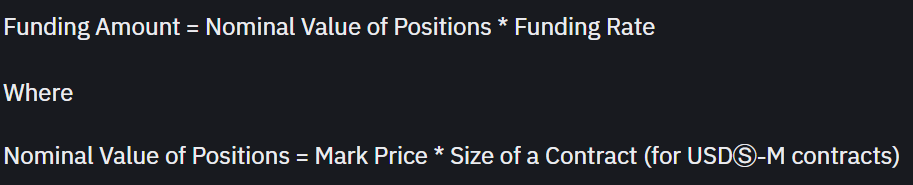

In [147]:
# Расчет дохода от ставки финансирования
fr_df['доход'] = fr_df['fundingRate'] * quantity * fr_df['markPrice']

C:\Users\ekart\AppData\Local\Temp\ipykernel_9952\1020493480.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [148]:
fr_df

,symbol,fundingRate,markPrice,доход
fundingTime,,,,
2023-12-27 00:00:00+00:00,AUCTIONUSDT,-0.002859,39.260000,-112.247481
2023-12-27 04:00:00+00:00,AUCTIONUSDT,-0.000852,37.070000,-31.574002
2023-12-27 08:00:00+00:00,AUCTIONUSDT,-0.000880,37.130000,-32.689252
2023-12-27 12:00:00.001000+00:00,AUCTIONUSDT,-0.002797,38.220000,-106.882994
2023-12-27 16:00:00+00:00,AUCTIONUSDT,-0.008223,39.900000,-328.117650
2023-12-27 20:00:00+00:00,AUCTIONUSDT,-0.008022,39.380000,-315.894546
2023-12-28 00:00:00+00:00,AUCTIONUSDT,-0.011136,44.366294,-494.082127


In [149]:
# Расчет кумулятивного дохода
fr_df['кумулятивный_доход'] = fr_df['доход'].cumsum()

C:\Users\ekart\AppData\Local\Temp\ipykernel_9952\1283450845.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
fr_df

,symbol,fundingRate,markPrice,доход,кумулятивный_доход
fundingTime,,,,,
2023-12-27 00:00:00+00:00,AUCTIONUSDT,-0.002859,39.260000,-112.247481,-112.247481
2023-12-27 04:00:00+00:00,AUCTIONUSDT,-0.000852,37.070000,-31.574002,-143.821483
2023-12-27 08:00:00+00:00,AUCTIONUSDT,-0.000880,37.130000,-32.689252,-176.510735
2023-12-27 12:00:00.001000+00:00,AUCTIONUSDT,-0.002797,38.220000,-106.882994,-283.393729
2023-12-27 16:00:00+00:00,AUCTIONUSDT,-0.008223,39.900000,-328.117650,-611.511379
2023-12-27 20:00:00+00:00,AUCTIONUSDT,-0.008022,39.380000,-315.894546,-927.405925
2023-12-28 00:00:00+00:00,AUCTIONUSDT,-0.011136,44.366294,-494.082127,-1421.488052


# Визуализация

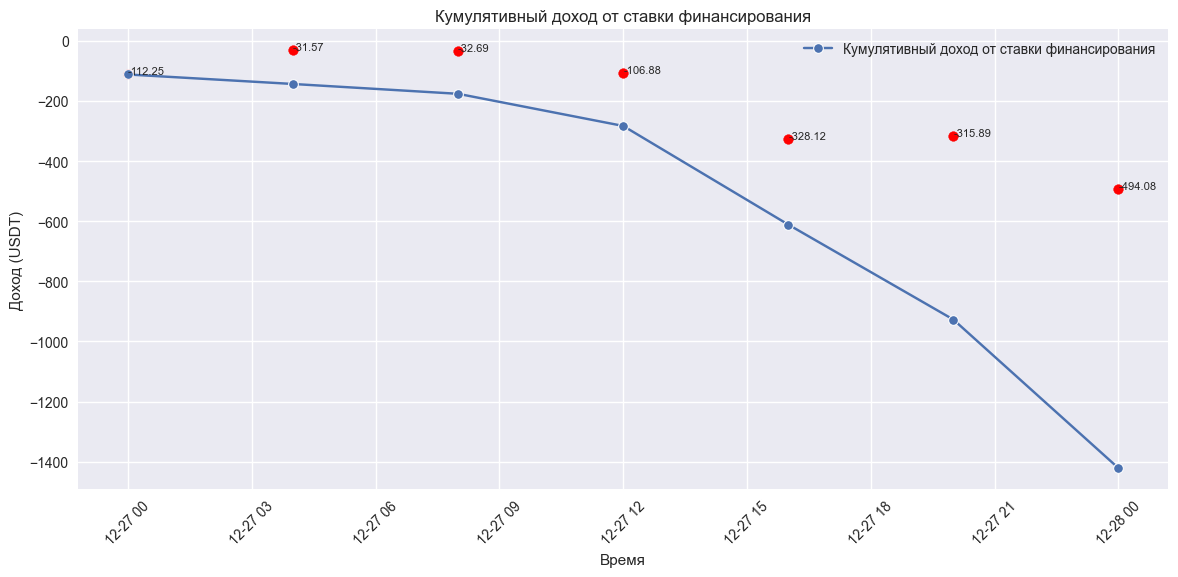

In [151]:
# Визуализация кумулятивного дохода
plt.figure(figsize=(12, 6))
sns.lineplot(data=fr_df, x=fr_df.index, y='кумулятивный_доход', marker='o', label='Кумулятивный доход от ставки финансирования')
plt.scatter(fr_df.index, fr_df['доход'], color='red')  # Добавляем точки дохода
for i, value in enumerate(fr_df['доход']):
    plt.text(fr_df.index[i], value, f"{value:.2f}", fontsize=8)  # Отображаем значения дохода на графике
plt.xlabel('Время')
plt.ylabel('Доход (USDT)')
plt.title('Кумулятивный доход от ставки финансирования')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

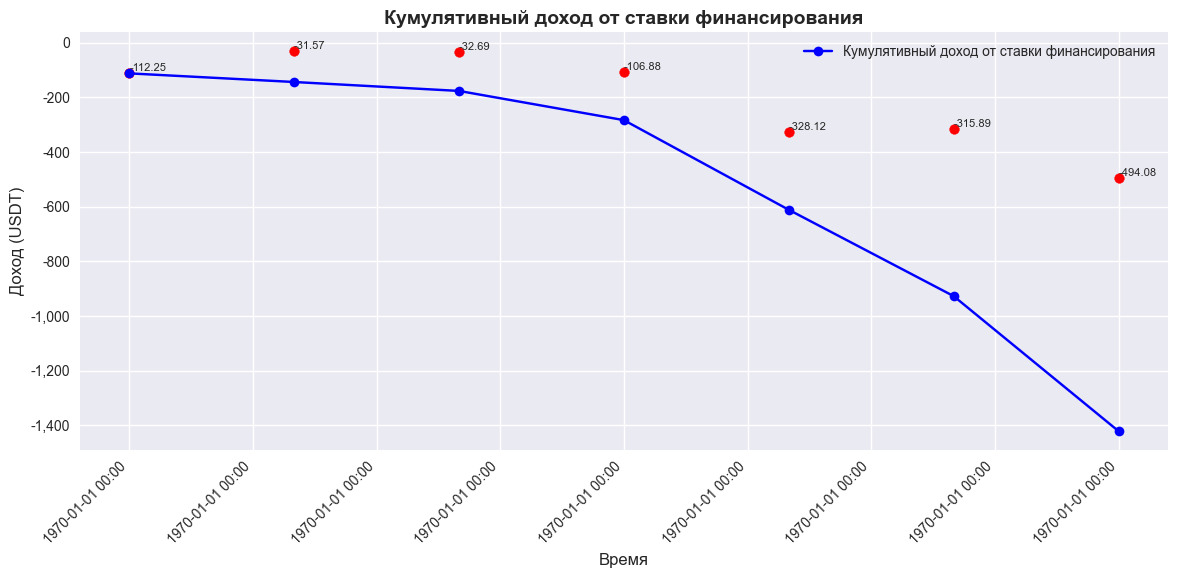

In [152]:
import matplotlib.ticker as mticker

# Устанавливаем стиль графика
plt.style.use('seaborn-v0_8')

# Создаем объект графика и осей
fig, ax = plt.subplots(figsize=(12, 6))

# Рисуем линию кумулятивного дохода
ax.plot(fr_df.index, fr_df['кумулятивный_доход'], marker='o', color='blue', label='Кумулятивный доход от ставки финансирования')

# Добавляем точки дохода и аннотируем их
ax.scatter(fr_df.index, fr_df['доход'], color='red')  # Добавляем точки дохода
for i, value in enumerate(fr_df['доход']):
    ax.text(fr_df.index[i], value, f"{value:.2f}", fontsize=8, verticalalignment='bottom')  # Отображаем значения дохода

# Устанавливаем заголовки и метки осей
ax.set_title('Кумулятивный доход от ставки финансирования', fontsize=14, fontweight='bold')
ax.set_xlabel('Время', fontsize=12)
ax.set_ylabel('Доход (USDT)', fontsize=12)

# Добавляем сетку
ax.grid(True)

# Форматируем метки осей
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: pd.to_datetime(x).strftime('%Y-%m-%d %H:%M')))
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Устанавливаем поворот меток на оси X для лучшей читаемости
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Устанавливаем параметры легенды
ax.legend()

# Отображаем график
plt.tight_layout()
plt.show()


In [153]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [154]:
import plotly.graph_objs as go
from plotly.offline import iplot

# Создаем объекты для линий графика
trace1 = go.Scatter(
    x=fr_df.index, 
    y=fr_df['кумулятивный_доход'], 
    mode='lines+markers',
    name='Кумулятивный доход',
    marker=dict(color='blue'),
    line=dict(width=2)
)

trace2 = go.Scatter(
    x=fr_df.index, 
    y=fr_df['доход'] * (-1), 
    mode='markers',
    name='Доход за период',
    marker=dict(color='red', size=8)
)

# Добавляем текст к точкам на графике, если доход не равен нулю
text = [str(round(value, 2)) if value != 0 else '' for value in fr_df['доход']]

trace2.update(text=text)
trace2.update(textposition='top center')

# Определяем макет графика
layout = go.Layout(
    title='Кумулятивный доход от ставки финансирования',
    xaxis=dict(
        title='Время',
        tickformat='%Y-%m-%d %H:%M',
        tickangle=45
    ),
    yaxis=dict(
        title='Доход (USDT)'
    ),
    showlegend=True
)

# Создаем фигуру с данными и макетом
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Отображаем график
iplot(fig)
